## Compton calculations
Notebook to calculate Compton rates, asymmetries, etc.
Default units are cm and MeV

In [1]:
import numpy as np
import scipy.integrate as integrate
import matplotlib.pyplot as plt

In [2]:
#Define some constants/parameters
Me=0.51099006
re=2.818E-13
hbarc=1.9732858E-11
e=1.6022E-19
c=2.9979E10
pi=3.141592653589793
# Laser parameters
laser_lambda=532E-7
sigmalaser=100E-4
siglaserz=60E-12*c
alphac=10E-3
alpha=alphac/2.0
plaser = 5
# Beam parameters
Ebeam=5000
#Ebeam=11000
Ibeam=1
sigmabeam=300E-4
sigbeamz = 60E-12*c
flas=100E6
fbeam=100E6
fcoll=78000

In [3]:
Elaser = hbarc*2*pi/laser_lambda
gam = Ebeam/Me
a = 1.0/(1 + 4*gam*Elaser/Me)
Egmax = 4*gam**2*a*Elaser
Thetahalf = np.sqrt(1/(a*gam**2))
#thetagamma = np.sqrt((Elaser/(rho*Egmax)*4.0*a*gam**2 - 1)/(a*gam**2))
#rho = Eg/Egmax 
rho0 = 1/(1 + a)
Pbeam = np.sqrt(Ebeam**2 - Me**2) 
rhomin=Elaser/Egmax
print('Laser energy (MeV): ',Elaser)
print('Maximum backscattered photon energy (MeV): ',Egmax)
print('Photon cone half-angle (deg.): ',Thetahalf*180/pi)
print('Rho at zero crossing: ',rho0)

Laser energy (MeV):  2.3305489371101722e-06
Maximum backscattered photon energy (MeV):  757.355762386553
Photon cone half-angle (deg.):  0.006356700858973076
Rho at zero crossing:  0.5409707299619114


In [4]:
#Define some functions
def compton_xsec(rho):
 first = rho**2*(1.0-a)**2/(1.0-rho*(1.-a))
 second = (1-rho*(1+a))/(1-rho*(1-a))
 dsig = 2.*pi*re**2*a*(first+1.0+second**2)
 return dsig

def compton_asy_par(rho):
 first = rho**2*(1.0-a)**2/(1.0-rho*(1.-a))
 second = (1-rho*(1+a))/(1-rho*(1-a))

 term1 = 1.0/(first+1.0+second**2)
 term2 = 1.0-rho*(1+a)
 term3 = 1.0-1.0/(1.0-rho*(1.-a))**2

 asy=term1*term2*term3

 return asy

def compton_asy_perp(rho):
 first = rho**2*(1.0-a)**2/(1.0-rho*(1.-a))
 second = (1-rho*(1+a))/(1-rho*(1-a))

 term1 = 1.0/(first+1.0+second**2)
 term2 = rho*(1-a)
 term3 = np.sqrt(4*a*rho*(1-rho))/(1-rho*(1-a))

 asy = term1*term2*term3
 return asy
 

In [5]:
#Calculate luminosity, cross section
Ne = Ibeam/e/c
Nphot = plaser/(e*1E6*Elaser*c)
LumiCW = c*(1.0 + np.cos(alphac))*Ne*Nphot/(np.sin(alphac)*np.sqrt(2*pi)*np.sqrt(sigmabeam**2 + sigmalaser**2))
print('Luminosity for CW laser/beam (small crossing angle): ', LumiCW)
Nep = Ibeam/e/fbeam
Nphotp = plaser/(e*1E6*Elaser*flas)
LumiP = flas*Nep*Nphotp*np.cos(alpha)/2/pi*1/np.sqrt(sigmabeam**2+sigmalaser**2)*1/np.sqrt((sigmabeam**2+sigmalaser**2)*np.cos(alpha)**2+(siglaserz**2+sigbeamz**2)*np.sin(alpha)**2)
print('Luminosity for Pulsed laser/beam (small crossing angle): ', LumiP)
LumiSingleBunch = fcoll*Nep*Nphotp*np.cos(alpha)/2/pi*1/np.sqrt(sigmabeam**2+sigmalaser**2)*1/np.sqrt((sigmabeam**2+sigmalaser**2)*np.cos(alpha)**2+(siglaserz**2+sigbeamz**2)*np.sin(alpha)**2)
print('Luminosity for Pulsed laser colliding with one beam bunch (small crossing angle): ', LumiSingleBunch)
xsect = integrate.quad(lambda rho: compton_xsec(rho),rhomin,1.0)
rate = xsect[0]*LumiSingleBunch
print('Backscattered photon rate (Hz)', rate)

Luminosity for CW laser/beam (small crossing angle):  7.033923214036582e+30
Luminosity for Pulsed laser/beam (small crossing angle):  1.23406279354574e+32
Luminosity for Pulsed laser colliding with one beam bunch (small crossing angle):  9.625689789656774e+28
Backscattered photon rate (Hz) 54762.597489816624


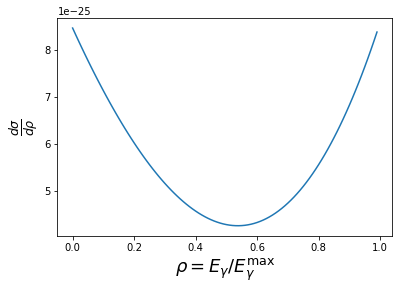

In [6]:
rr = np.arange(0,1.0,0.01)
plt.xlabel(r'$\rho=E_{\gamma}/E^\mathrm{max}_{\gamma}$',fontsize=18)
plt.ylabel(r'$\frac{d\sigma}{d\rho}$',fontsize=18)
plt.plot(rr, compton_xsec(rr))

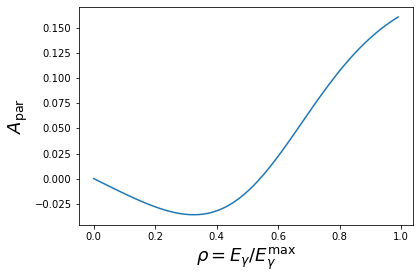

In [7]:
rr = np.arange(0,1.0,0.01)
plt.xlabel(r'$\rho=E_{\gamma}/E^\mathrm{max}_{\gamma}$',fontsize=18)
plt.ylabel(r'$A_\mathrm{par}$',fontsize=18)
plt.plot(rr, compton_asy_par(rr))

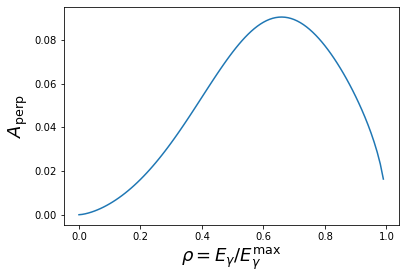

In [8]:
plt.xlabel(r'$\rho=E_{\gamma}/E^\mathrm{max}_{\gamma}$',fontsize=18)
plt.ylabel(r'$A_\mathrm{perp}$',fontsize=18)
plt.plot(rr, compton_asy_perp(rr))

In [9]:
# Calculate measurement times
# need to define desired statistical precision (dP/P) and polarization
dP=0.01
Pe=0.8

In [10]:
# Average asymmetry (longitudinal)
num = integrate.quad(lambda rho: compton_asy_par(rho)*compton_xsec(rho),rhomin,1.0)
A_avg = num[0]/xsect[0]
t_avg = 1.0/(rate*dP**2*Pe**2*A_avg**2)
print('Average longitudinal asymmetry: ', A_avg)
print('Time for 1% measurement (s): ', t_avg)

Average longitudinal asymmetry:  0.034279767552694615
Time for 1% measurement (s):  242.80646713860298


In [11]:
# Differential measurement (longitudinal), avg. of A**2
num = integrate.quad(lambda rho: (compton_asy_par(rho))**2*compton_xsec(rho),rhomin,1.0)
A2_avg = num[0]/xsect[0]
t_avg = 1.0/(rate*dP**2*Pe**2*A2_avg)
print('sqrt(Average asymmetry**2): ', np.sqrt(A2_avg))
print('Time for 1% measurement (s): ', t_avg)

sqrt(Average asymmetry**2):  0.0778275182091374
Time for 1% measurement (s):  47.105283641332825


In [12]:
# Energy-weighted asymmetry (long)
num = integrate.quad(lambda rho: rho*(compton_asy_par(rho))*compton_xsec(rho),rhomin,1.0)
den= integrate.quad(lambda rho: rho*compton_xsec(rho),rhomin,1.0)
EgammaA_avg = num[0]/den[0]
t_avg = 1.0/(rate*dP**2*Pe**2*EgammaA_avg**2)
print('sqrt(Average asymmetry**2): ', np.sqrt(A2_avg))
print('Time for 1% measurement (s): ', t_avg)

sqrt(Average asymmetry**2):  0.0778275182091374
Time for 1% measurement (s):  52.121535333829854
